# Phần 2: Trình bày dữ liệu

Bảng tần số của GT:
GT
M    52
F    48
Name: count, dtype: int64

Bảng tần suất của GT:
GT
M    0.52
F    0.48
Name: proportion, dtype: float64


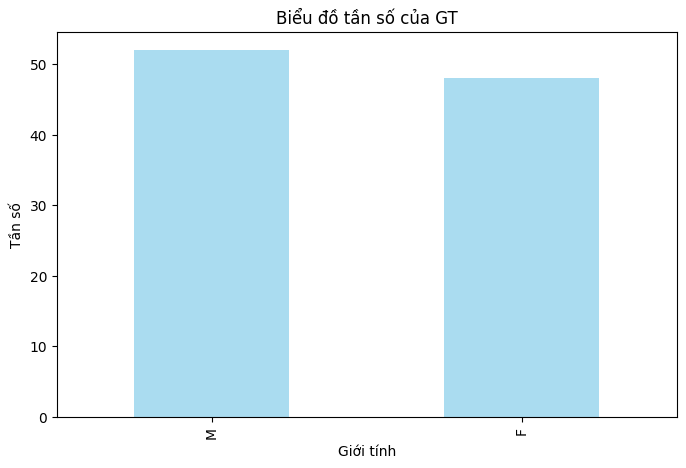

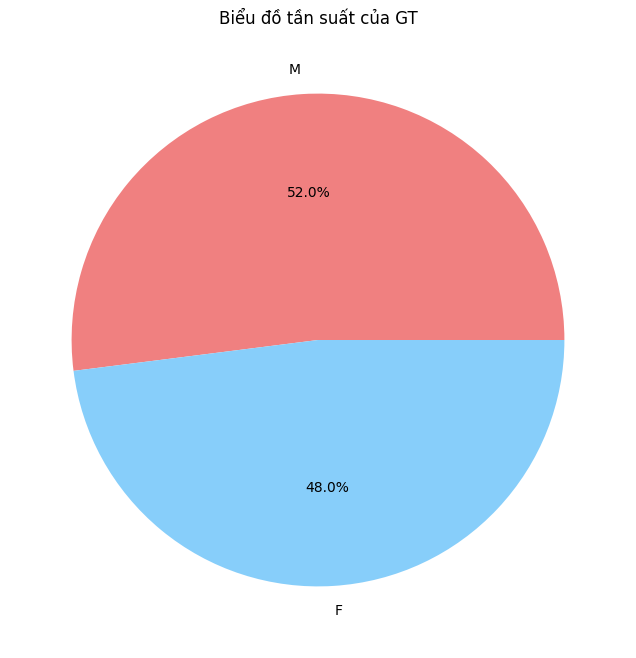

In [3]:
#Câu 1: Trình bày dữ liệu biến GT
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('processed_dulieuxettuyendaihoc.csv')

freq_table_GT = df['GT'].value_counts()
rel_freq_GT = df['GT'].value_counts(normalize=True)

print("Bảng tần số của GT:")
print(freq_table_GT)
print("\nBảng tần suất của GT:")
print(rel_freq_GT)

plt.figure(figsize=(8, 5))
freq_table_GT.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Biểu đồ tần số của GT')
plt.xlabel('Giới tính')
plt.ylabel('Tần số')
plt.show()

plt.figure(figsize=(8, 8))
freq_table_GT.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Biểu đồ tần suất của GT')
plt.ylabel('')
plt.show()



Thống kê mô tả cho US_TBM1:
count    100.000000
mean       2.434480
std        0.391203
min        1.616000
25%        2.107000
50%        2.480000
75%        2.724000
max        3.232000
Name: US_TBM1, dtype: float64


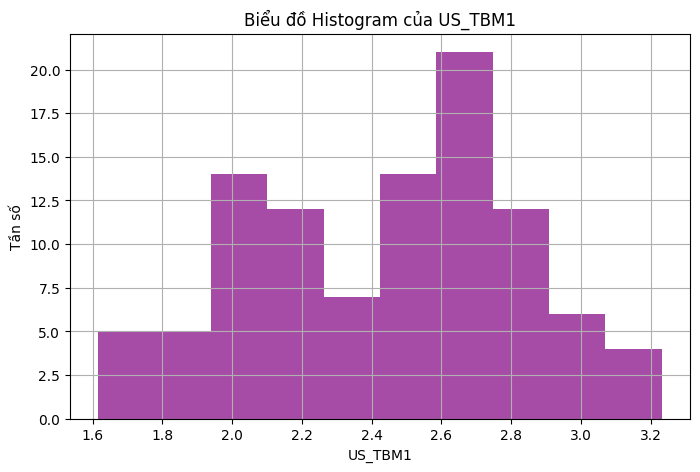


Thống kê mô tả cho US_TBM2:
count    100.000000
mean       2.559600
std        0.377656
min        1.768000
25%        2.223000
50%        2.588000
75%        2.893000
max        3.416000
Name: US_TBM2, dtype: float64


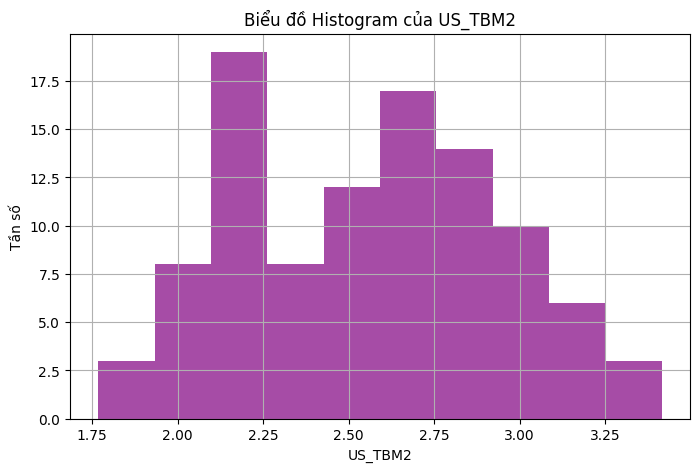


Thống kê mô tả cho US_TBM3:
count    100.00000
mean       2.67176
std        0.29981
min        1.91600
25%        2.47300
50%        2.70600
75%        2.87400
max        3.31600
Name: US_TBM3, dtype: float64


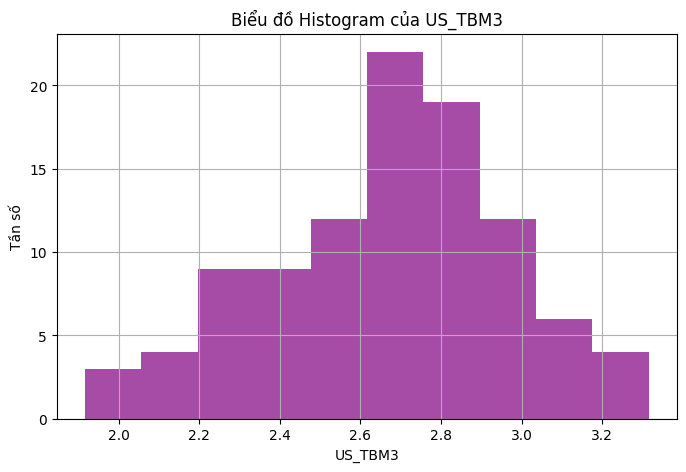

In [4]:
#Câu 2: Trình bày dữ liệu các biến US_TBM1, US_TBM2 và US_TBM3
for var in ['US_TBM1', 'US_TBM2', 'US_TBM3']:
    print(f"\nThống kê mô tả cho {var}:")
    print(df[var].describe())

    # Vẽ biểu đồ histogram
    plt.figure(figsize=(8, 5))
    df[var].hist(bins=10, color='purple', alpha=0.7)
    plt.title(f'Biểu đồ Histogram của {var}')
    plt.xlabel(var)
    plt.ylabel('Tần số')
    plt.show()


In [2]:
import pandas as pd
df = pd.read_csv("processed_dulieuxettuyendaihoc.csv")


Dữ liệu cột DT của học sinh nam:
count    52.000000
mean      0.134615
std       0.840841
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       6.000000
Name: DT, dtype: float64


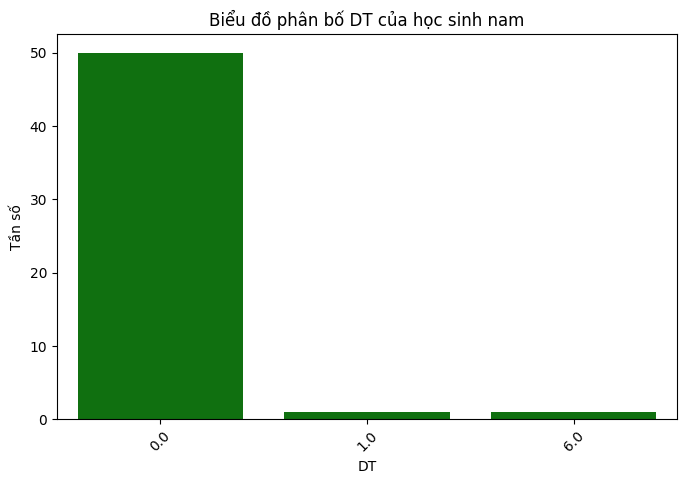

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

df_nam = df[df["GT"] == "M"]

print("Dữ liệu cột DT của học sinh nam:")
print(df_nam["DT"].describe())

plt.figure(figsize=(8, 5))
sns.countplot(data=df_nam, x="DT", color="green")
plt.title("Biểu đồ phân bố DT của học sinh nam")
plt.xlabel("DT")
plt.ylabel("Tần số")
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("processed_dulieuxettuyendaihoc.csv")

print("GT unique values:", df['GT'].unique())
print("DT unique values:", df['DT'].unique())

df['GT'] = df['GT'].replace({'M': 'Nam', 'F': 'Nữ'})

df['DH1'] = pd.to_numeric(df['DH1'], errors='coerce')
df['DH2'] = pd.to_numeric(df['DH2'], errors='coerce')
df['DH3'] = pd.to_numeric(df['DH3'], errors='coerce')

df_filtered = df[(df['GT'] == 'Nam') & 
                 (df['DT'] == 'Kinh') & 
                 (df['DH1'] >= 5.0) & 
                 (df['DH2'] >= 4.0) & 
                 (df['DH3'] >= 4.0)]

if df_filtered.empty:
    print("Không có dữ liệu thỏa mãn các điều kiện lọc.")
else:
    print("Dữ liệu biến KV của học sinh thỏa điều kiện:")
    print(df_filtered['KV'].value_counts())
    
    # Vẽ biểu đồ
    plt.figure(figsize=(8, 5))
    df_filtered['KV'].value_counts().plot(kind='bar', color='orange', alpha=0.7)
    plt.title('Biểu đồ tần số của KV (Nam, Dân tộc Kinh, Đạt điểm)')
    plt.xlabel('Khu vực')
    plt.ylabel('Tần số')
    plt.show()


GT unique values: ['F' 'M']
DT unique values: [0. 1. 6.]
Không có dữ liệu thỏa mãn các điều kiện lọc.


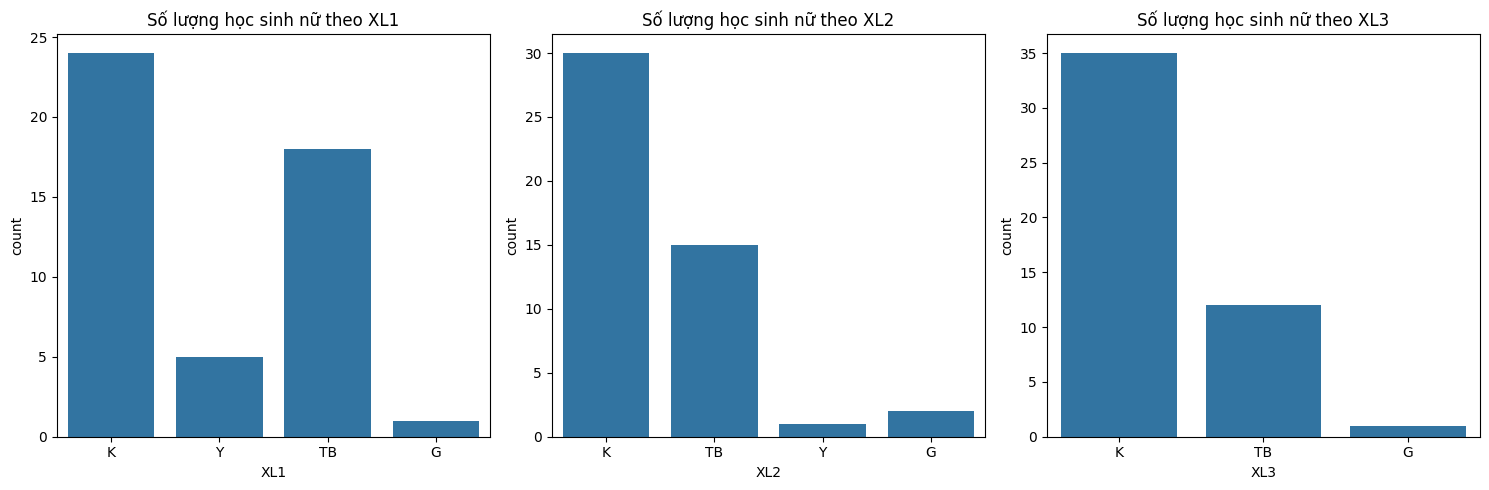

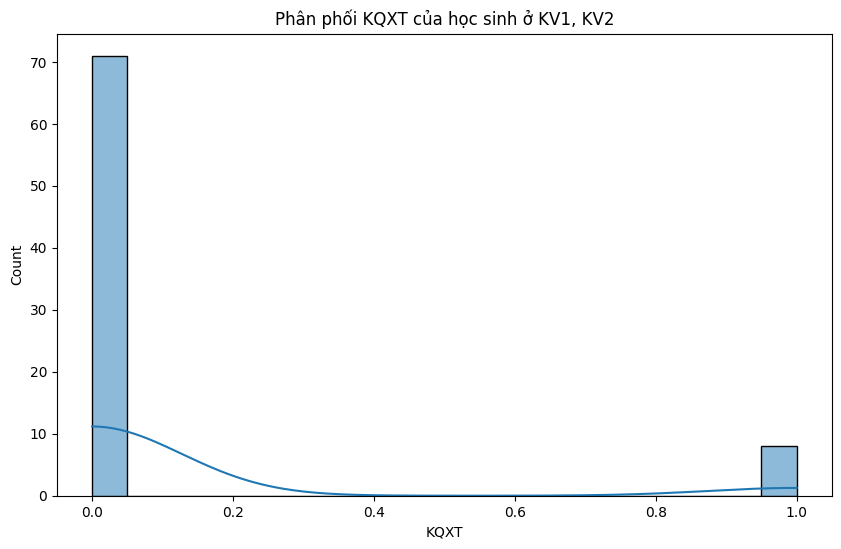

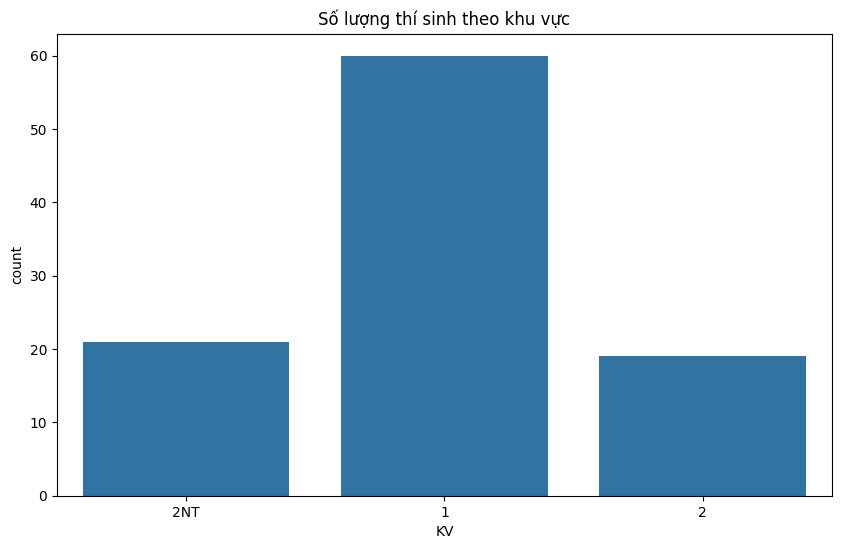

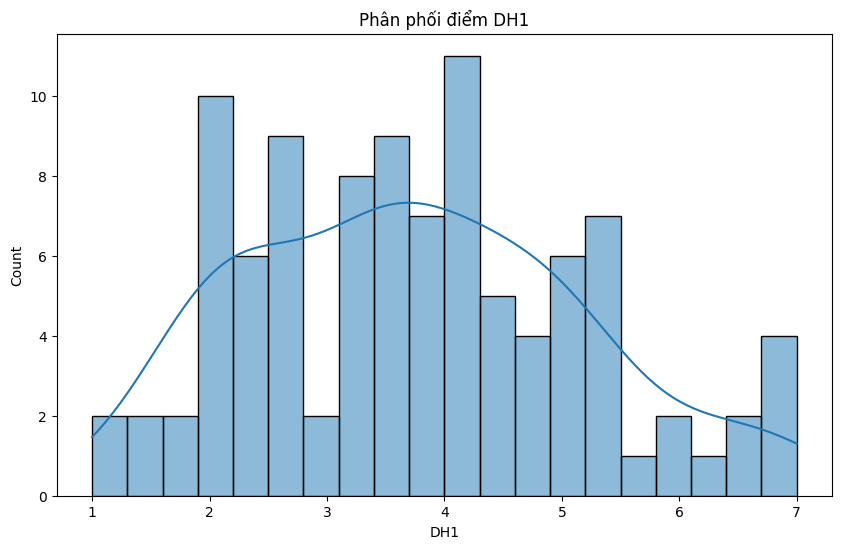

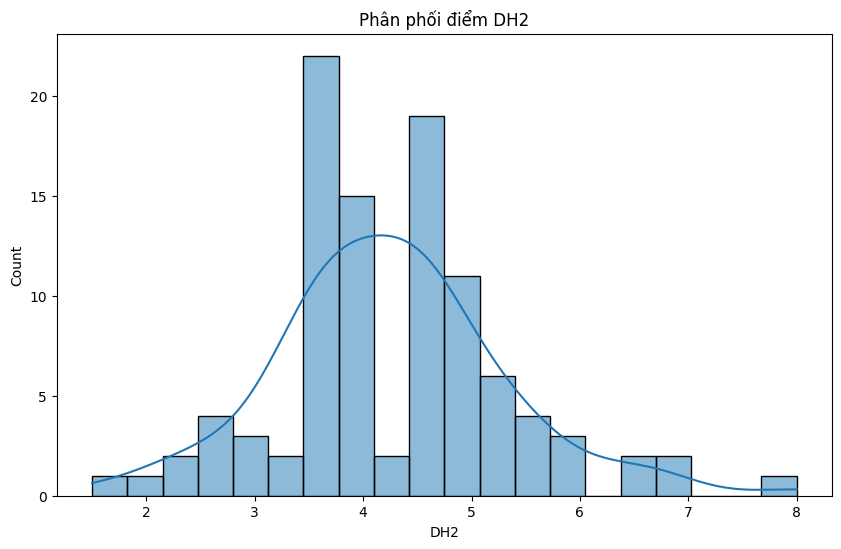

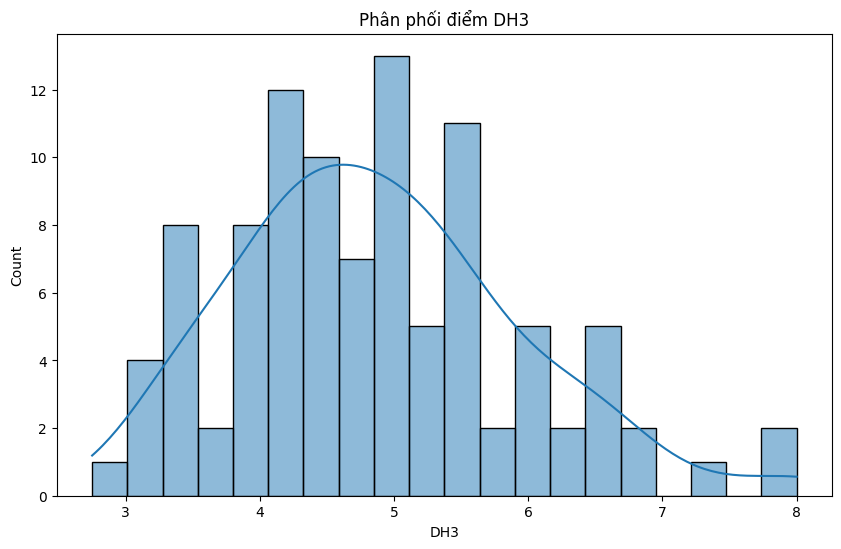

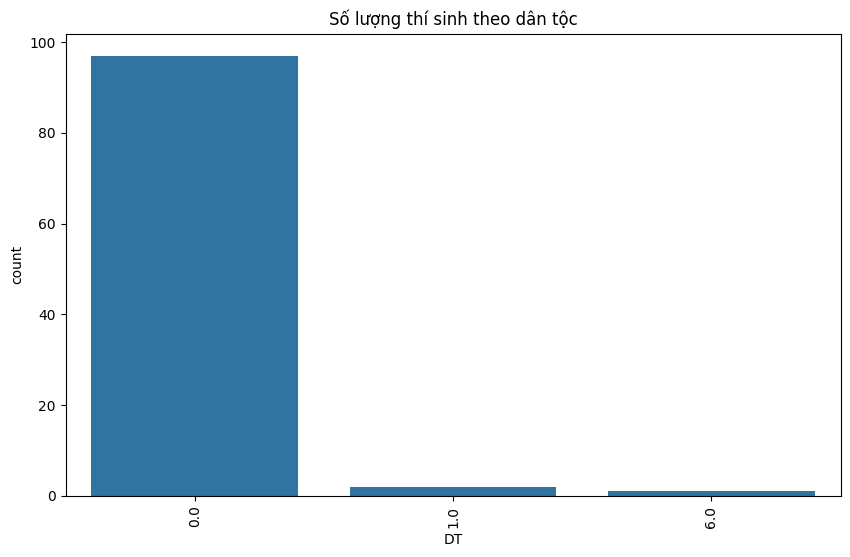

Mô tả thống kê của DH1, DH2, DH3:
        DH1   DH2  DH3
count  1.00  1.00  1.0
mean   6.75  5.25  5.0
std     NaN   NaN  NaN
min    6.75  5.25  5.0
25%    6.75  5.25  5.0
50%    6.75  5.25  5.0
75%    6.75  5.25  5.0
max    6.75  5.25  5.0


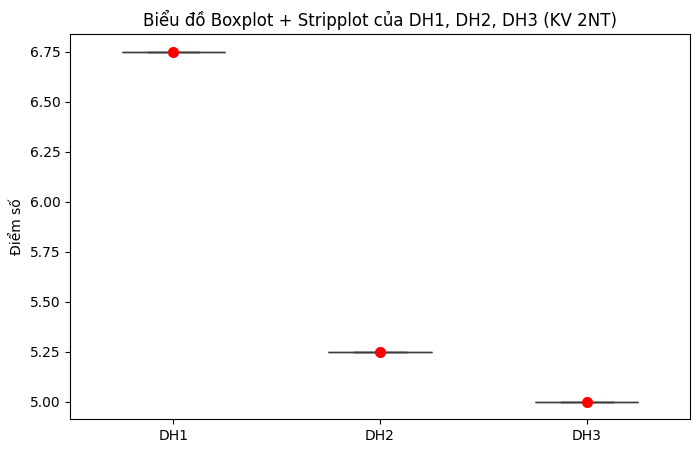

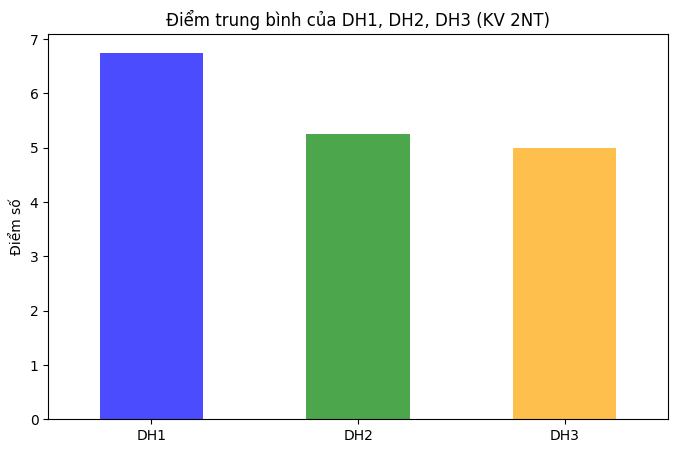

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("processed_dulieuxettuyendaihoc.csv")

required_columns = ["GT", "DT", "KV", "DH1", "DH2", "DH3", "KT", "TBM1", "TBM2", "TBM3", "XL1", "XL2", "XL3", "KQXT"]
missing_columns = [col for col in required_columns if col not in df.columns]
if missing_columns:
    raise KeyError(f"Các cột bị thiếu trong dữ liệu: {missing_columns}")

df_female = df[df["GT"].isin(["Nữ", "F"])]
plt.figure(figsize=(15, 5))
for i, xl in enumerate(["XL1", "XL2", "XL3"], 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df_female, x=xl)
    plt.title(f"Số lượng học sinh nữ theo {xl}")
plt.tight_layout()
plt.show()

df_kqxt = df[df["KV"].isin(["1", "2"])]
plt.figure(figsize=(10, 6))
sns.histplot(data=df_kqxt, x="KQXT", kde=True, bins=20)
plt.title("Phân phối KQXT của học sinh ở KV1, KV2")
plt.show()

df["KV"] = df["KV"].astype(str)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="KV")
plt.title("Số lượng thí sinh theo khu vực")
plt.show()

df["DH1"] = df["DH1"].astype(float)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="DH1", kde=True, bins=20)
plt.title("Phân phối điểm DH1")
plt.show()

df["DH2"] = df["DH2"].astype(float)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="DH2", kde=True, bins=20)
plt.title("Phân phối điểm DH2")
plt.show()

df["DH3"] = df["DH3"].astype(float)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="DH3", kde=True, bins=20)
plt.title("Phân phối điểm DH3")
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="DT")
plt.title("Số lượng thí sinh theo dân tộc")
plt.xticks(rotation=90)
plt.show()

df_2NT = df[(df['KV'] == '2NT') & (df['DH1'] >= 5.0) & (df['DH2'] >= 5.0) & (df['DH3'] >= 5.0)]

if df_2NT.empty:
    print("Không có dữ liệu thỏa mãn điều kiện!")
else:
    print("Mô tả thống kê của DH1, DH2, DH3:")
    print(df_2NT[['DH1', 'DH2', 'DH3']].describe())
    
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_2NT[['DH1', 'DH2', 'DH3']], width=0.5)
    sns.stripplot(data=df_2NT[['DH1', 'DH2', 'DH3']], color='red', size=8, jitter=False)
    plt.title('Biểu đồ Boxplot + Stripplot của DH1, DH2, DH3 (KV 2NT)')
    plt.ylabel('Điểm số')
    plt.show()
    
    if len(df_2NT) == 1:
        plt.figure(figsize=(8, 5))
        df_2NT[['DH1', 'DH2', 'DH3']].mean().plot(kind='bar', color=['blue', 'green', 'orange'], alpha=0.7)
        plt.title('Điểm trung bình của DH1, DH2, DH3 (KV 2NT)')
        plt.ylabel('Điểm số')
        plt.xticks(rotation=0)
        plt.show()
